In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
%matplotlib inline
import time 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/ESE 545/Project 3/Movies.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Movies = pd.read_csv(url)  
Movies = Movies.drop(['tconst', 'titleType', 'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes'], axis=1)
dataset = np.asarray(Movies)

In [ ]:
# batch_size, number of iteration, dataset, number of centroid 
def mini_batch_kmeans(batch_size, num_iteration, dataset, num_centroid):
    center = dataset[np.random.choice(dataset.shape[0],num_centroid)]
    return center
    print(center)
    v = np.zeros((num_centroid,1),dtype=float)
    for i in range(num_iteration):
        sampled_data = dataset[np.random.choice(dataset.shape[0],batch_size)]
        for j in range(batch_size):
            distance = np.linalg.norm((sampled_data[j]-center),axis=1)
            min_index = np.argmin(distance)
            v[min_index] += 1
            ita = 1/v[min_index]
            center[min_index]  = (1-ita)*center[min_index] + ita*sampled_data[j] 
    return center

In [ ]:
def model_eva(data, centers):
    dis = -2*np.dot(data,centers.T) # m*k, all the distances between datas X and centers C
    dis += np.sum(data**2,axis=1)[:,np.newaxis] # axis = 1, row
    dis += np.sum(centers**2,axis=1)[np.newaxis,:] # axis = 0, col
    dis = np.sqrt(np.abs(dis))    
    min_d = np.min(dis,axis = 1)
    mean = np.mean(min_d)
    minn = np.min(min_d)
    maxx = np.max(min_d)
    return mean, minn, maxx

In [ ]:
def draw_kmeans():
  centroids = [5, 10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
  centers = []
  mean_dis = []
  min_dis = []
  max_dis = []
  for i in range(len(centroids)):
    batch_size = 100
    num_iteration = 100
    center = mini_batch_kmeans(batch_size, num_iteration, dataset, centroids[i])
    centers.append(center)
    mean, minn, maxx = model_eva(dataset, center)
    mean_dis.append(mean)
    min_dis.append(minn)
    max_dis.append(maxx)
  return mean_dis, min_dis, max_dis
  # plt.plot(centroids,mean_dis)
  # plt.plot(centroids,min_dis)
  # plt.plot(centroids,max_dis)
  # plt.xlabel('number of centroids')
  # plt.ylabel('distance')
  # plt.title('Distance vs. Number of Centroids (kmeans)')


In [ ]:
def find_nearest_centroid(dataset, centroid):
    dis = -2*np.dot(dataset,centroid.T) # m*k, all the distances between datas X and centers C
    dis += np.sum(dataset**2,axis=1)[:,np.newaxis] # axis = 1, row
    dis += np.sum(centroid**2,axis=1)[np.newaxis,:] # axis = 0, col
    dis = np.sqrt(np.abs(dis))    
    min_d = np.min(dis,axis = 1)
    return min_d

In [ ]:
def init_centroid(dataset, num_centroid):
  m, n = dataset.shape
  center = dataset[np.random.randint(0,len(dataset), size = 1)]
  dis_mat = np.array(np.square(dataset-center).sum(axis = 1))
  p_x = dis_mat/sum(dis_mat)
  acc_center = []
  for i in range(1,num_centroid):
    idx = np.random.choice(np.arange(0,m), p=p_x)
    center = np.vstack([center,dataset[idx]])
    dis = np.array(np.square(dataset - center[i]).sum(axis=1))
    dis_mat = np.vstack([dis_mat,dis])
    dis = dis_mat.min(axis=0)
    p_x = dis/sum(dis)
  return center

In [ ]:
def mini_batch_kmeanspp(batch_size, num_iteration, dataset, num_centroid):
    center = init_centroid(dataset, num_centroid)
    v = np.zeros((num_centroid,1),dtype=float)
    for i in range(num_iteration):
        sampled_data = dataset[np.random.choice(dataset.shape[0],batch_size)]
        for j in range(batch_size):
            distance = np.linalg.norm((sampled_data[j]-center),axis=1)
            min_index = np.argmin(distance)
            v[min_index] += 1
            ita = 1/v[min_index]
            center[min_index]  = (1-ita)*center[min_index] + ita*sampled_data[j] 
    return center

In [ ]:
def mini_batch_kmeanspp_draw(batch_size, num_iteration, dataset, num_centroid, center):
    v = np.zeros((num_centroid,1),dtype=float)
    for i in range(num_iteration):
        sampled_data = dataset[np.random.choice(dataset.shape[0],batch_size)]
        for j in range(batch_size):
            distance = np.linalg.norm((sampled_data[j]-center),axis=1)
            min_index = np.argmin(distance)
            v[min_index] += 1
            ita = 1/v[min_index]
            center[min_index]  = (1-ita)*center[min_index] + ita*sampled_data[j] 
    return center

In [ ]:
def draw_kmeanspp():
    num_centroid = [5, 10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    centers = []
    mean_dis = []
    min_dis = []
    max_dis = []
    for i in range(len(centroids)):
        batch_size = 100
        num_iteration = 100
        center = mini_batch_kmeanspp_draw(batch_size, num_iteration, dataset, num_centroid[i], centroids[i])
        centers.append(center)
        mean, minn, maxx = model_eva(dataset, center)
        mean_dis.append(mean)
        min_dis.append(minn)
        max_dis.append(maxx)
    return mean_dis, min_dis, max_dis

In [ ]:
def main(dataset):
  kmeans_center = mini_batch_kmeans(100, 100, dataset, 100)
  kmeanspp_center = mini_batch_kmeanspp(100, 100, dataset, 100)
  return kmeans_center, kmeanspp_center

In [ ]:
kmeans_center, kmeanspp_center = main(dataset)

Text(0.5, 1.0, 'Distance vs. Number of Centroids (kmeans)')

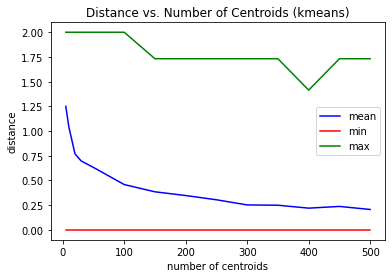

In [ ]:
# Plot Result - K-means
k_means_mean_dis, k_means_min_dis, k_means_max_dis = draw_kmeans()

centroids = [5, 10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
fig, ax = plt.subplots()

ax.plot(centroids,k_means_mean_dis, '-b',label="mean")
ax.plot(centroids,k_means_min_dis, '-r',label = 'min')
ax.plot(centroids,k_means_max_dis, '-g',label = 'max')
leg = ax.legend()
plt.xlabel('number of centroids')
plt.ylabel('distance')
plt.title('Distance vs. Number of Centroids (kmeans)')

In [ ]:
# Plot Result - K-means++
start = time.time()
kmeanspp_center = init_centroid(dataset, 500)
print(time.time() - start)
centroids = [kmeanspp_center[0:5,:], kmeanspp_center[0:10,:], kmeanspp_center[0:20,:], kmeanspp_center[0:30,:], kmeanspp_center[0:50,:], kmeanspp_center[0:100,:], kmeanspp_center[0:150,:], kmeanspp_center[0:200,:], kmeanspp_center[0:250,:], kmeanspp_center[0:300,:], kmeanspp_center[0:350,:], kmeanspp_center[0:400,:], kmeanspp_center[0:450,:], kmeanspp_center[0:500,:]]
k_meanspp_mean_dis, k_meanspp_min_dis, k_meanspp_max_dis = draw_kmeanspp()

centroids = [5, 10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
fig, ax = plt.subplots()

ax.plot(centroids,k_meanspp_mean_dis, '-b',label="mean")
ax.plot(centroids,k_meanspp_min_dis, '-r',label = 'min')
ax.plot(centroids,k_meanspp_max_dis, '-g',label = 'max')
leg = ax.legend()
plt.xlabel('number of centroids')
plt.ylabel('distance')
plt.title('Distance vs. Number of Centroids (kmeans++)')

In [ ]:
# Plot Result - Comparison
centroids = [5, 10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
fig, ax = plt.subplots()

ax.plot(centroids,k_meanspp_mean_dis, '-b',label="k-means++")
ax.plot(centroids,k_means_mean_dis, '-r',label = 'k-means')
leg = ax.legend()
plt.xlabel('number of centroids')
plt.ylabel('distance')
plt.title('Max Distance of K-means and K-means++')